<a href="https://colab.research.google.com/github/rafaelmgr12/UNIVESP-AlgeProg2/blob/master/Semana_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana 6

## Conceitos fundamentais da Web

### WWW e Internet



A Internet é uma rede global que conecta
computadores ao redor do globo. Permite a
troca de mensagens entre programas
conectados a ela.

A World Wide Web (WWW ou simplesmente
Web) é um sistema distribuído de documentos
ligados por hiperlinks e armazenados em
servidores Web espalhados pela Internet.

### Servidor e cliente



A comunicação entre programas tipicamente
ocorre quando um dos programas requisita
um recurso a outro programa.

O provedor do recurso é chamado de servidor
Web e quem requisita/recebe o recurso é
chamado de cliente.

O navegador é um cliente Web, e além de
requisitar um recurso, também processa o
recurso, exibindo o conteúdo na tela.

### URL



Para fazer a requisição de um recurso, é
necessário:
-Identificar o recurso
-Localizar o recurso
-Usar uma linguagem padronizada de
comunicação
A Web oferece funcionalidades para identificar
e localizar um recurso, além de um protocolo
de comunicação que permite a troca de
mensagens entre cliente e servidor.

A URL (Uniform Resource Locator) oferece um
identificador único para cada recurso na Web,
definindo também sua localização e o
protocolo de comunicação.
Exemplo:

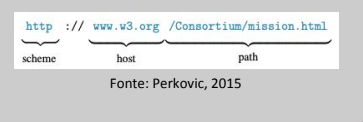

### Scheme



O esquema define como acessar o recurso. No
exemplo anterior, usamos o protocolo HTTP.
Existem outros protocolos conhecidos:
- HTTPS
- FTP
- MAILTO
- FILE
- etc.

### Host



O host é o nome do servidor que armazena o
recurso/documento.

O host é transformado em um endereço IP a
partir de uma consulta a um servidor de
nomes (DNS), realizada pelo cliente.

Tanto o hostname como o IP são únicos e
localizam o servidor na rede.

### Path



O path em uma URL especifica o caminho
relativo do recurso a partir de um diretório
predefinido (diretório raiz do servidor Web).

Uma vez localizado o servidor, é necessário
especificar em qual subdiretório do servidor o
recurso se encontra.

### HTTP

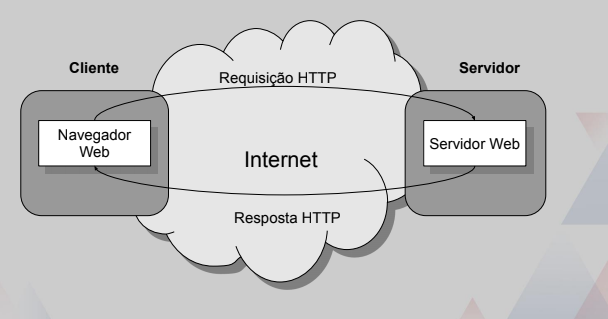

Padrão de mensagens requisição/resposta
entre cliente e servidor
Por padrão, usam-se conexões TCP/IP na
porta 80
Mensagem típica de requisição:

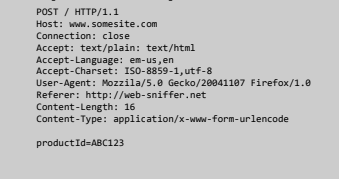

Mensagem típica de resposta:

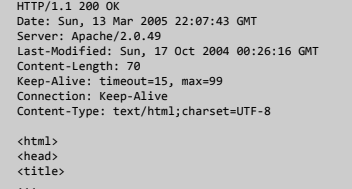

** Fluxo de requisições **

Passos para requisição de uma página Web

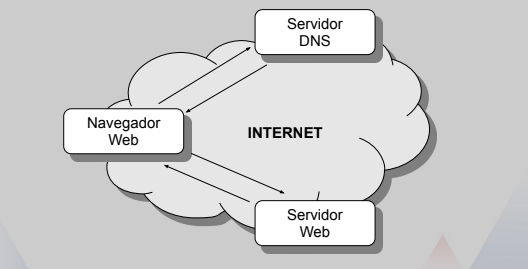

## HTML e JSON

###Intercâmbio de dados



A troca de informações entre diferentes
aplicações permite que programas sejam bem
aceitos e difundidos.
Para viabilizar essa comunicação, é
necessário que as aplicações sigam
determinados padrões previamente
especificados.
Nesta videoaula, veremos dois padrões
bastante conhecidos: HTML e JSON.

### HTML

Na aula anterior, vimos o conteúdo de uma típica
troca de mensagens entre cliente e servidor
usando o protocolo HTTP:

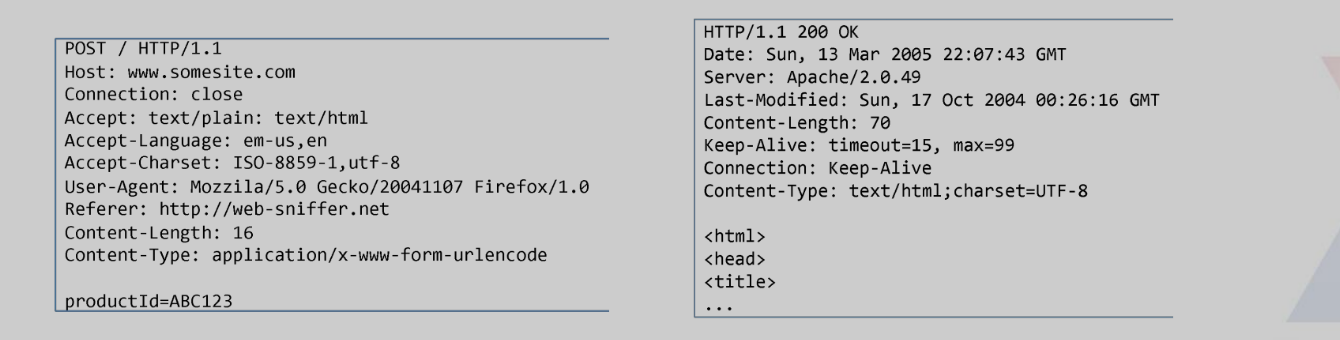

Se o cliente for um navegador Web será capaz
de interpretar o conteúdo da resposta,
apresentando-o na tela de maneira formatada.

Além do conteúdo em si, uma página Web
contém elementos que definem o layout,
cabeçalhos, imagens, vídeos, hiperlinks, etc.
Exemplo:

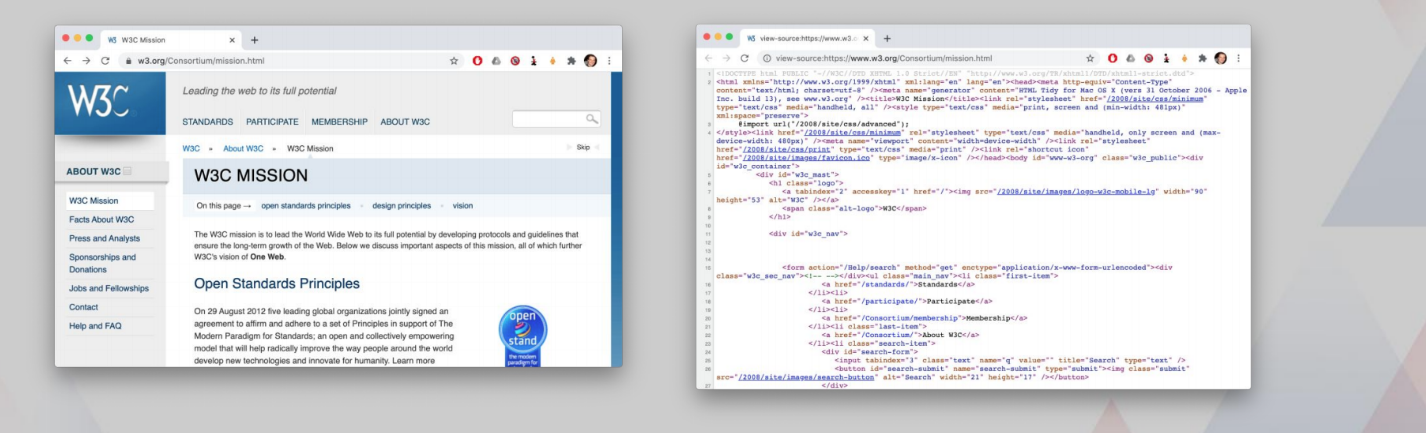

**HTML (HyperText Markup Language)** é uma
linguagem que permite definir cabeçalhos,
listas, imagens, vídeos, hiperlinks, etc. em
uma página Web.
Utilizam-se elementos HTML, cada um com
uma função específica.
Um elemento possui o seguinte formato:
```
<nome_tag atributo="valor">conteudo</nome_tag>
```

Exemplo

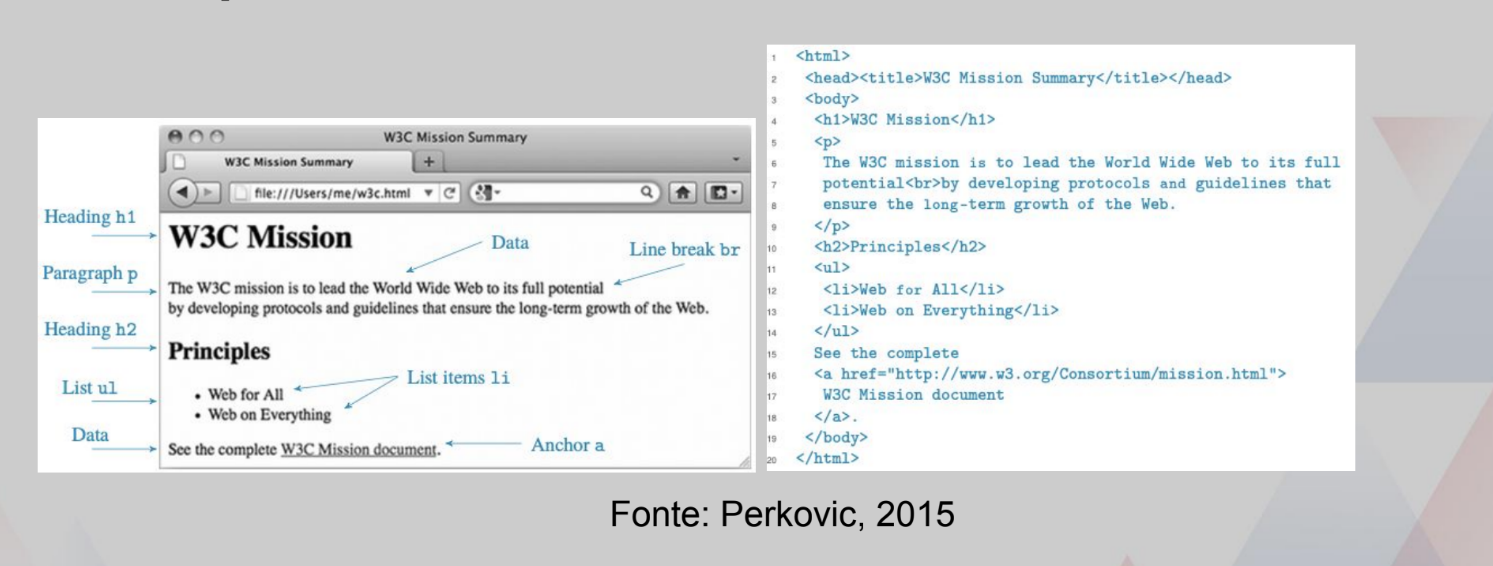

Um elemento pode estar contido em outro
elemento: aparece entre as tags de início e
fim.

```
<head><title>W3C Mission
Summary</title></head>
```

Os elementos de um documento HTML
formam uma árvore hierárquica, como
veremos a seguir.

Um elemento âncora serve para criar textos de
hiperlink:

```
<a href="URL">Texto de hiperlink</a>
```

onde "URL" é o endereço (relativo ou
absoluto) do recurso que foi ancorado.

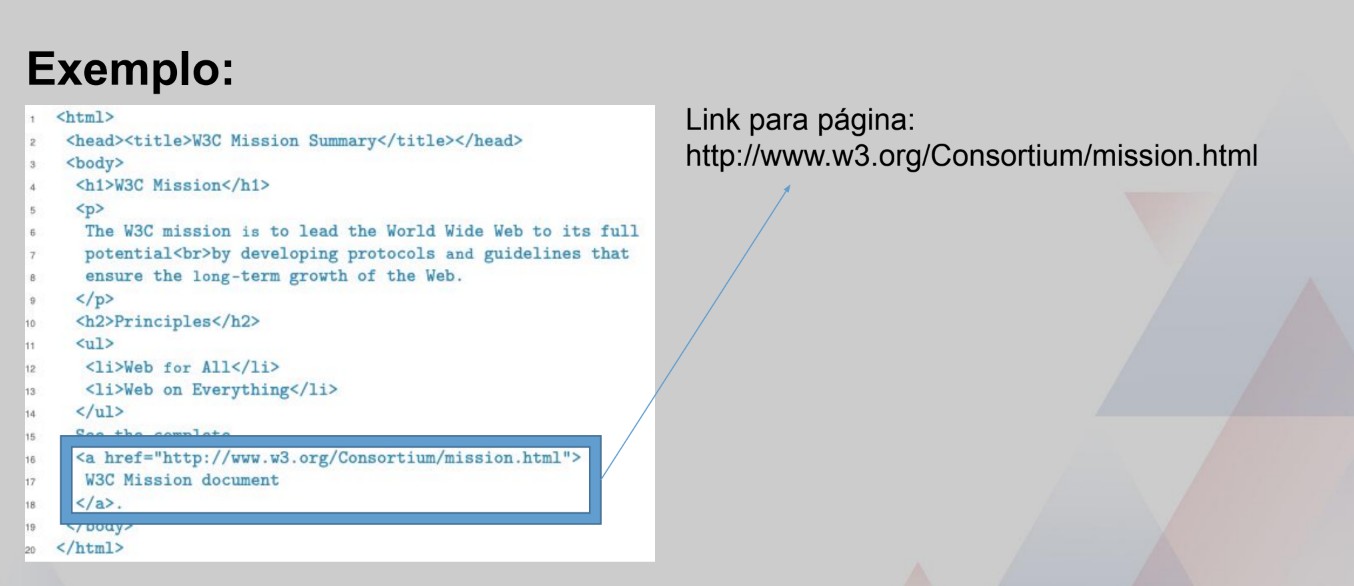

###JSON

JSON (JavaScript Object Notation) define um
formato padrão para descrever, em formato
texto, objetos como dicionários, listas,
números e strings.

A maioria das linguagens de programação
possui bibliotecas para produzir e processar
dados no formato JSON.

O módulo json da biblioteca padrão contém funções
para codificar objetos Python em JSON e vice-versa.
Exemplo:


In [6]:
import json
d = dict() 

d['a'] = 1 
d['b'] = 2 
d['c'] = [3,4] 
jd = json.dumps(d) 
jd


'{"a": 1, "b": 2, "c": [3, 4]}'

In [7]:
dd = json.loads(jd)
dd

{'a': 1, 'b': 2, 'c': [3, 4]}

In [8]:
type(dd)

dict

In [9]:
type(jd)

str

## Python WWW API

Nas duas aulas anteriores vimos:
- Fundamentos da Web, incluindo URL, HTTP
e HTML
- Intercâmbio de dados por meio de
padronizações (HTML e JSON)

Nesta aula, veremos alguns módulos da
biblioteca padrão Python para acessar e
processar recursos da Web.

### Módulo urllib.request



O módulo urllib.request permite requisitar e
receber recursos da Web, de modo similar a
um navegador.
A função urlopen():
- recebe como parâmetro uma URL
- formula uma requisição HTTP que será
enviada ao servidor especificado na URL
- obtém e retorna uma resposta HTTP
completa do servidor.

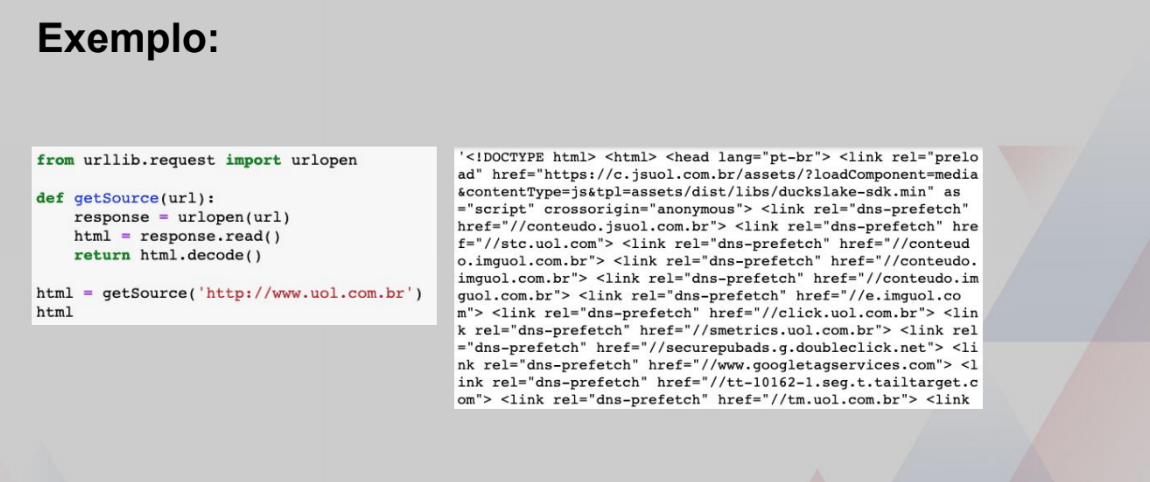

### Módulo html.parser

O módulo html.parser, por meio da classe
HTMLParser, permite processar elementos HTML de
uma página Web.

O método feed() da classe HTMLParser recebe
como entrada uma página HTML no formato string,
e para cada 'token' lido (tags de início, tags de fim,
texto, etc.), executa um handler correspondente.

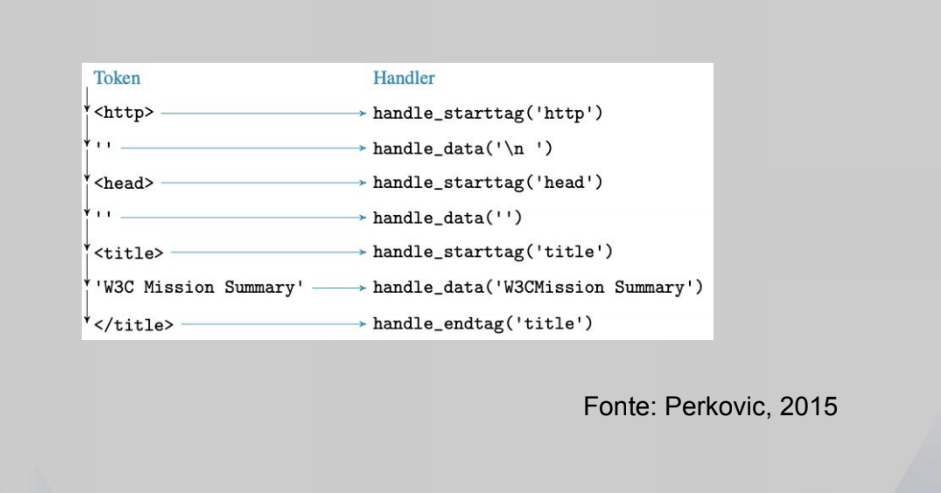

Inicialmente, cada handler é implementado para
não fazer nada. Assim, executamos o código
abaixo, o qual não gera nenhuma saída visível:

```
from html.parser import HTMLPARSER

parser = HTMLPARSER()
Parser.feed(html)
```

Para trazer funcionalidade a um determinado
handler, precisamos sobrescrever o método
correspondente, estendendo a classe
HTMLParser.

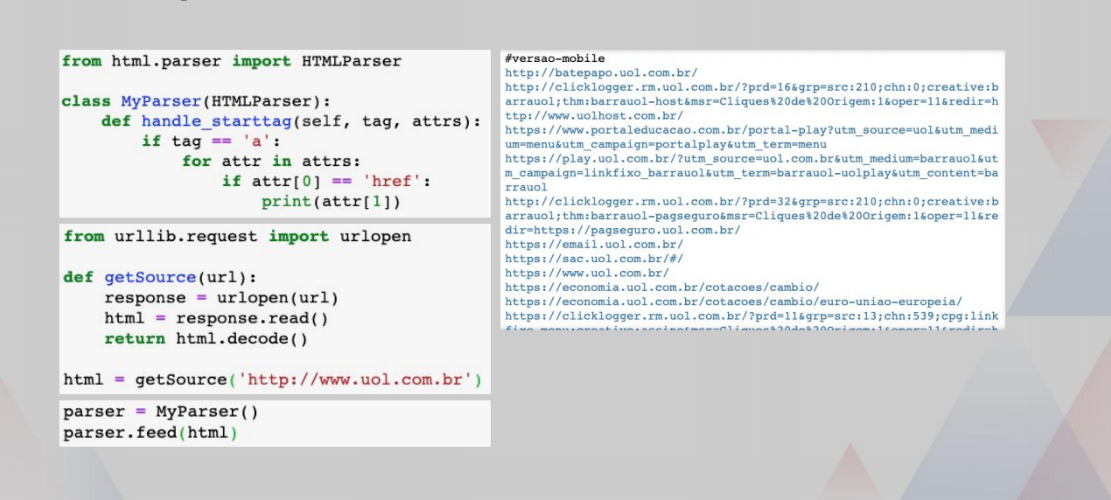

### Exemplo
Retornar o número de polos de um determinado
curso da UNIVESP.

In [14]:
from html.parser import HTMLParser
from urllib.request import urlopen, Request


class MyParser(HTMLParser):
  def __init__(self):
    HTMLParser.__init__(self)
    self.n_polos = 0
  def handle_starttag(self, tag, attrs):
    if tag == 'p':
      for attr in attrs:
        if attr[0] == 'class' and attr[1] == 'item-polos':
          self.n_polos += 1
  def num_polos(self):
    return self.n_polos


###Outro exemplo



Retornar o número de polos de um determinado
curso da UNIVESP.




In [17]:
def getSource(url):
  headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.3'}
  reg_url = "https:XXXXOOOO"
  req = Request(url=url, headers=headers)
  html = urlopen(req).read()
  return html.decode()

html = getSource('https://univesp.br/cursos/engenharia-de-computacao')
parser = MyParser()
parser.feed(html)
parser.num_polos()


357